# [실습3] AI 적용을 위한 데이터 전처리 및 회귀분석 실습

---

## 실습 목표
---
- 잉크젯 데이터 학습을 위해 학습에 용이하게 데이터를 전처리하는 과정을 살펴봅니다.
- 데이터 전처리 과정에서 필요한 방법론을 실습해봅니다.
- 다양한 기법을 활용해 회귀분석을 진행해봅니다.

## 실습 목차

1. **데이터 탐색** : 잉크젯 데이터 전체를 탐색해봅니다.
2. **데이터 전처리** : 데이터를 학습에 용이하게 전처리를 진행합니다.
3. **회귀분석 실습** : **LinearRegression, KNN, SVM, AdaBoost, Bagging, RandomForest** 등 다양한 모델을 사용해 실습을 진행해봅니다.
4. **연습문제** : 연습문제를 통해 실제 모델을 구현해보고, 결과를 확인합니다.

---

## 1. 데이터 탐색

### 1.1 데이터 및 라이브러리 불러오기

데이터 탐색 및 시각화를 위한 라이브러리를 불러옵니다.

 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

잉크젯 데이터를 불러옵니다.

In [2]:
df = pd.read_csv('InkjetDB.csv')

### 1.2 데이터 탐색

잉크젯 데이터는 총 4개의 컬럼과 1000개의 정수형 데이터로 구성되어있습니다.

In [3]:
df.head() #데이터를 확인합니다.

,Viscosity,Velocity,PrintingSpeed,PatternSize
0,6,4,200,0
1,8,5,150,19
2,10,4,50,0
3,9,10,250,0
4,10,2,50,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Viscosity      1000 non-null   int64
 1   Velocity       1000 non-null   int64
 2   PrintingSpeed  1000 non-null   int64
 3   PatternSize    1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


타겟값으로 이용할 **PatternSize** 컬럼의 최소값이 0입니다. 즉, 0값이 존재합니다. 얼마나 존재하는지 살펴보겠습니다.

In [5]:
df.describe()

,Viscosity,Velocity,PrintingSpeed,PatternSize
count,1000.00000,1000.000000,1000.000000,1000.0000
mean,5.49900,5.500000,137.500000,24.1390
std,2.87337,2.873719,71.842964,71.5325
min,1.00000,1.000000,25.000000,0.0000
25%,3.00000,3.000000,75.000000,0.0000
50%,5.50000,5.500000,137.500000,0.0000
75%,8.00000,8.000000,200.000000,0.0000
max,10.00000,10.000000,250.000000,740.0000


In [6]:
df['PatternSize'].value_counts() # 0으로 채워진 값이 많음

0      775
50       9
30       7
21       5
70       5
      ... 
94       1
151      1
168      1
254      1
226      1
Name: PatternSize, Length: 131, dtype: int64

전체 1000개의 데이터 중 0으로 채워진 데이터가 775개가 존재합니다.

### 1.3 데이터 시각화

---

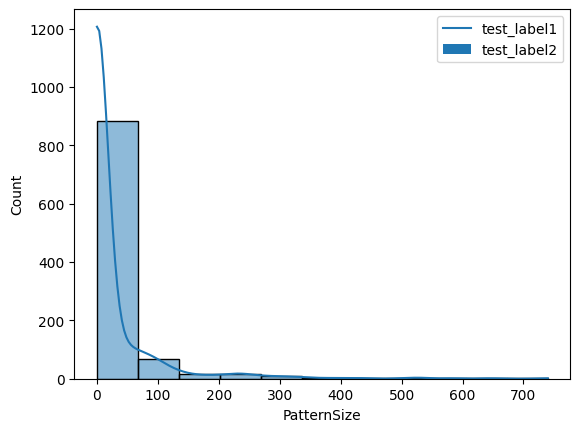

In [7]:
sns.histplot(df['PatternSize'], kde=True) # kde(커널 밀도 추정)
plt.legend(['test_label1', 'test_label2'])

예상대로 0값이 많이 존재합니다. \
나머지 컬럼들의 값 분포도 확인해보겠습니다. subplot을 이용해 각 시각화 그래프를 한번에 그려보겠습니다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


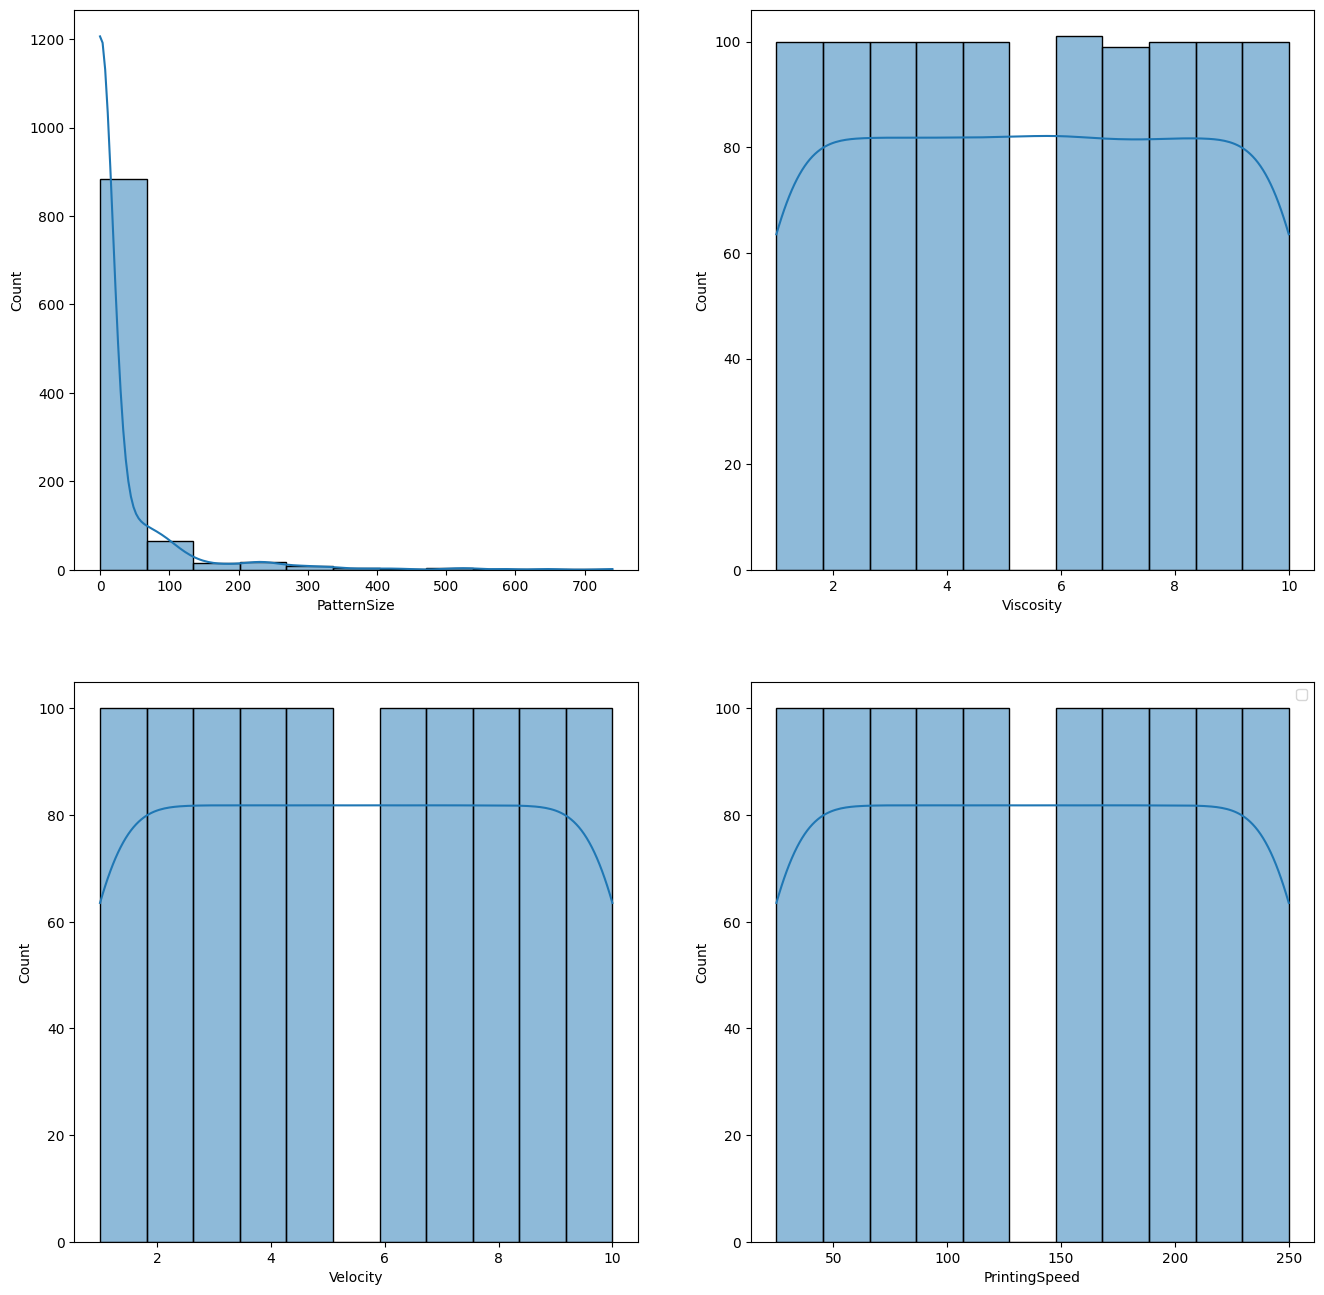

In [8]:
nrows = 2
ncols = 2
palette1 = sns.color_palette("hls", 8)
fig, axs = plt.subplots(nrows= nrows, ncols = ncols)
fig.set_size_inches(16,16)
sns.histplot(df['PatternSize'], kde=True, ax=axs[0][0])
sns.histplot(df['Viscosity'], kde=True, ax=axs[0][1])
sns.histplot(df['Velocity'], kde=True, ax=axs[1][0])
sns.histplot(df['PrintingSpeed'], kde=True, ax=axs[1][1])
plt.legend()

In [9]:
df.var() # 분산값

Viscosity           8.256255
Velocity            8.258258
PrintingSpeed    5161.411411
PatternSize      5116.898578
dtype: float64

- 나머지 3개의 컬럼인 'Viscosity', 'Velocity', 'PrintingSpeed' 컬럼은 값이 골고루 분포하고 있는것을 확인할 수 있습니다.
- 각 컬럼들이 타깃값인 'PatternSize' 와의 상관계수를 계산해 히트맵으로 표현해보도록 하겠습니다.

<AxesSubplot:>

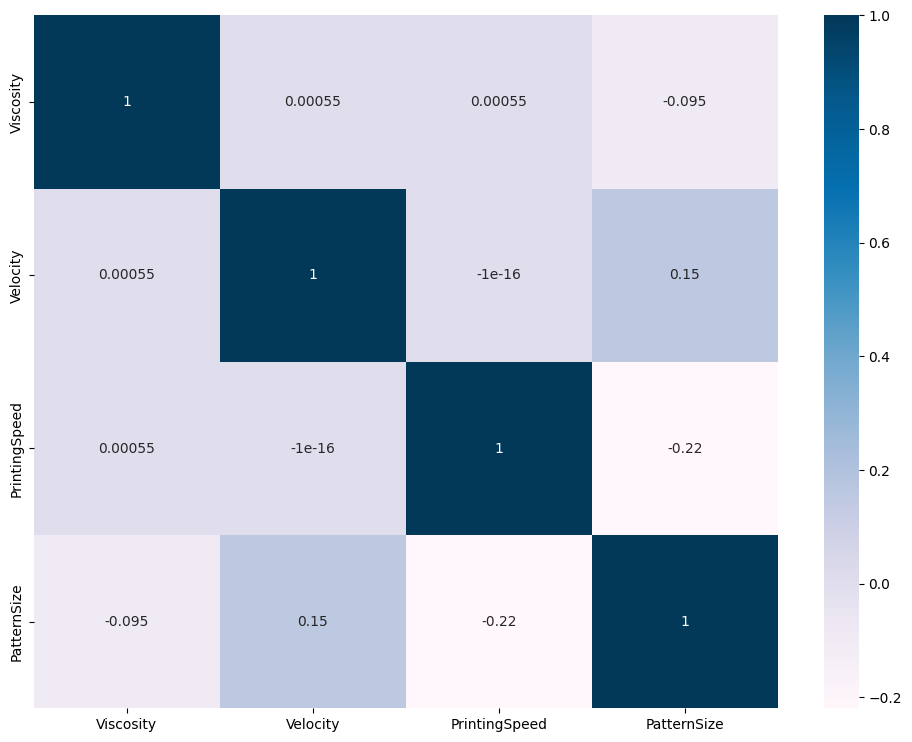

In [10]:
corr_list = df[['Viscosity', 'Velocity', 'PrintingSpeed', 'PatternSize']] # 상관관계에 컬럼 리스트

corr = corr_list.astype('float32').corr() # .corr()로 상관계수 계산
f,ax = plt.subplots(figsize=(12,9))

# 잉크잿 생성과정에서 데이터간의 상관관계 시각화
sns.heatmap(corr, cmap='PuBu', annot=True)

## 2. 데이터 전처리

---

### 2.1 중복값 제거

---

duplicated()와 집계함수인 sum()을 이용해 전체 데이터의 중복값을 가지는 데이터가 얼마나 존재하는지 살펴보도록 하겠습니다.

In [11]:
df.duplicated().sum()

1

중복값이 1개 존재합니다. 제거하는 과정을 진행합니다.

In [12]:
df.drop_duplicates(inplace=True)

# 중복값 제거 후 중복값 개수 확인
df.duplicated().sum()

0

### 2.2 결측치 제거

해당 데이터는 결측치가 존재하지 않는것으로 나옵니다. 하지만 타겟값인 'PatternSize'에는 0값을 가지는 데이터가 775개씩이나 존재합니다. 이들을 결측치로 판단하고 제거해보겠습니다. \
결측치는 isna()를 이용해 확인할 수 있습니다.

In [13]:
df.isna().sum()

Viscosity        0
Velocity         0
PrintingSpeed    0
PatternSize      0
dtype: int64

1. 행에 0이 포함된 인덱스를 추출합니다.
2. drop()을 이용해 해당 인덱스값의 데이터를 삭제합니다.

In [14]:
zero_rows = df[df['PatternSize'] == 0].index # 0이 포함된 행의 인덱스를 추출합니다.
df.drop(zero_rows, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1 to 980
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Viscosity      225 non-null    int64
 1   Velocity       225 non-null    int64
 2   PrintingSpeed  225 non-null    int64
 3   PatternSize    225 non-null    int64
dtypes: int64(4)
memory usage: 8.8 KB


 제거하고 나니 225개의 데이터만이 남았습니다. 'PatternSize'컬럼을 다시 시각화해보겠습니다.

<AxesSubplot:xlabel='PatternSize', ylabel='Count'>

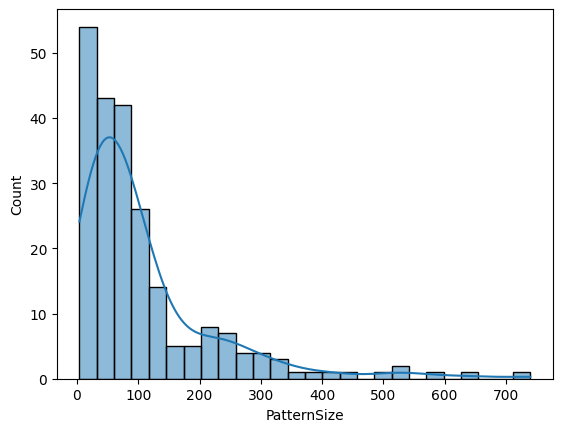

In [15]:
sns.histplot(df['PatternSize'], kde=True)

이전에 0이 대다수를 차지했지만 지금은 그래프의 값이 이전보다 비교적 고르게 분포하는 모습을 볼 수 있습니다. \
다른 데이터들의 분포도 변한것을 확인해볼 수 있습니다.

<AxesSubplot:xlabel='PrintingSpeed', ylabel='Count'>

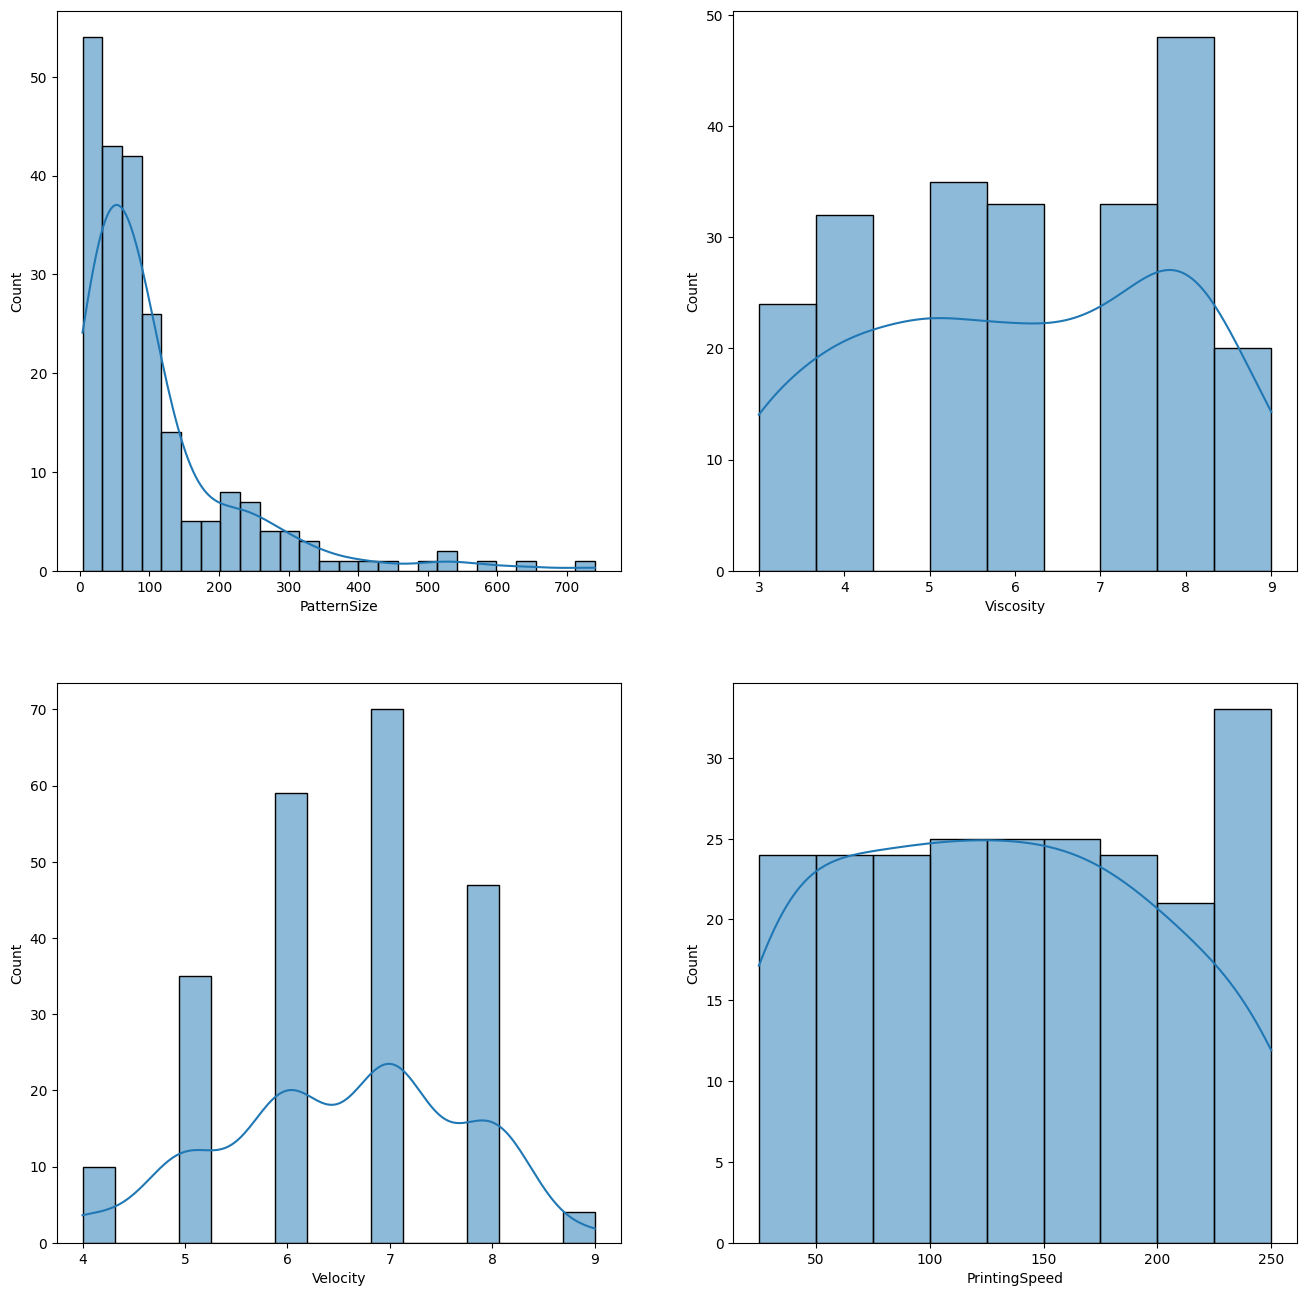

In [16]:
nrows = 2
ncols = 2
palette1 = sns.color_palette("hls", 8)
fig, axs = plt.subplots(nrows= nrows, ncols = ncols)
fig.set_size_inches(16,16)
sns.histplot(df['PatternSize'], kde=True, ax=axs[0][0])
sns.histplot(df['Viscosity'], kde=True, ax=axs[0][1])
sns.histplot(df['Velocity'], kde=True, ax=axs[1][0])
sns.histplot(df['PrintingSpeed'], kde=True, ax=axs[1][1])


### 2.3 X, y 분리

데이터를 학습용 컬럼과 타깃컬럼을 분리해줍니다.

In [17]:
X = df.iloc[:, :3]
y = df['PatternSize']

X.count()

Viscosity        225
Velocity         225
PrintingSpeed    225
dtype: int64

### 2.4 피쳐 스케일링 (Feature Scaling)

---

피쳐 : 데이터에 담겨져 있는 값을 말합니다.
- Standard Scaling 또는 MinMax Scaling을 하면 값의 범위들이 일정수준으로 맞춰지면서 비교, 분석을 할 수 있게 됩니다.
  - **표준화 (Standard Scaling)** : 평균값(.mean())과 분산값(.var())을 구하기 위해 사용합니다. 데이터를 평균이 0, 분산이 1인 정규분포로 만들어 주는 과정입니다.
  - **정규화 (MinMax Scaling)** : 피쳐 단위를 맞춰준 다음 최대값과 최소값을 구할 때 사용합니다. 사이킷런에서 제공하는 MinMaxScaler는 음수값이 없으면 0~1의 값으로 바뀝니다. 음수값이 있으면 -1 ~ 1 값으로 변환됩니다. 
- 표준화가 가능하면 표준화를 아닐 때는 정규화를 하면 됩니다.

#### 2.4.1 정규화

---

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [20]:
X_df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
print('feature들의 최소 값')
print(X_df_scaled.min())
print('\nfeature들의 최대 값')
print(X_df_scaled.max())

feature들의 최소 값
Viscosity        0.0
Velocity         0.0
PrintingSpeed    0.0
dtype: float64

feature들의 최대 값
Viscosity        1.0
Velocity         1.0
PrintingSpeed    1.0
dtype: float64


최대값과 최소값이 1/0으로 정돈된 것을 살펴볼 수 있습니다.

#### 2.4.2 표준화

---

표준화를 진행해보겠습니다. 표준화는 평균이 0이고 분산이 1인 가우시안분포(정규분포)를 따르도록 처리해주는 것입니다. \
sklearn의 StandardScaler를 사용하겠습니다.

In [21]:
# 원래 데이터들의 평균과 분산 확인 
print('feature 들의 평균 값')
print(X.mean())
print('\nfeature 들의 분산 값')
print(X.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(X)
X_scaled = scaler.transform(X)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
print('feature 들의 평균 값')
print(X_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(X_df_scaled.var())

feature 들의 평균 값
Viscosity          6.080000
Velocity           6.537778
PrintingSpeed    129.777778
dtype: float64

feature 들의 분산 값
Viscosity           3.493571
Velocity            1.356825
PrintingSpeed    4728.745040
dtype: float64

=========== 표준화 ==============

feature 들의 평균 값
Viscosity        2.368476e-17
Velocity         2.842171e-16
PrintingSpeed    9.671276e-17
dtype: float64

feature 들의 분산 값
Viscosity        1.004464
Velocity         1.004464
PrintingSpeed    1.004464
dtype: float64


평균은 0에 가까운 수치로 변환되었고, 분산은 1에 가깝도록 변한 수치들을 확인할 수 있습니다.

### 2.5 전처리 데이터 저장

---

In [22]:
df = pd.concat([X, pd.DataFrame(y)], axis=1,)

In [23]:
df.to_csv('InkjetDB_preprocessing.csv')
# 다음 차시 전처리수행된 데이터를 이용하기 위함

## 3. 회귀분석 실습

---

### 3.1 학습 및 테스트 데이터세트 분리

---

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1 )
X.shape
print('학습 데이터 :' ,X_train.shape)
print('테스트 데이터 : ', X_test.shape)

학습 데이터 : (180, 3)
테스트 데이터 :  (45, 3)


### 3.2 선형 회귀(Linear Regression)

---

먼저 선형회귀를 이용해 회귀분석을 진행해보겠습니다. 평가지표는 결정계수와 평균제곱근오차(RMSE)를 사용합니다. \
**결정계수** : 독립 변수가 종속 변수를 얼마나 잘 설명해주는지 보여주는 지표  \
**평균제곱근오차** : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도로 정밀도(precision)를 표현하는데 적합 각각의 차이값은 잔차(residual)라고도 하며, 평균 제곱근 편차는 잔차들을 하나의 측도로 종합할 때 사용


- X가 Y와의 상관관계가 클수록 R2의 값은 1에 가까워진다.
- (R2≥0.65)정도가 되어야 의미있는 회귀식으로 본다.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2 = r2_score(y_test, lr_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.5776680930313834
평균제곱근오차 :  51.52825711652823


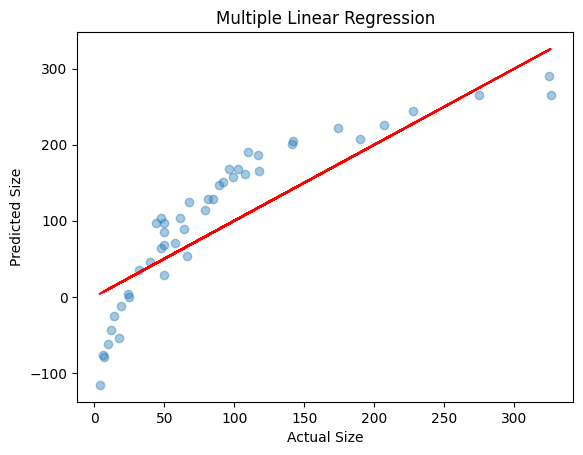

In [26]:
plt.scatter(y_test, lr_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("Multiple Linear Regression")
plt.show()

### 3.3 KNN(K-최근접 이웃)

---

**KNN Regressor** : 주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

knr_pred = knr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, knr_pred))
r2 = r2_score(y_test, knr_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.8896805636264151
평균제곱근오차 :  26.33567922040364


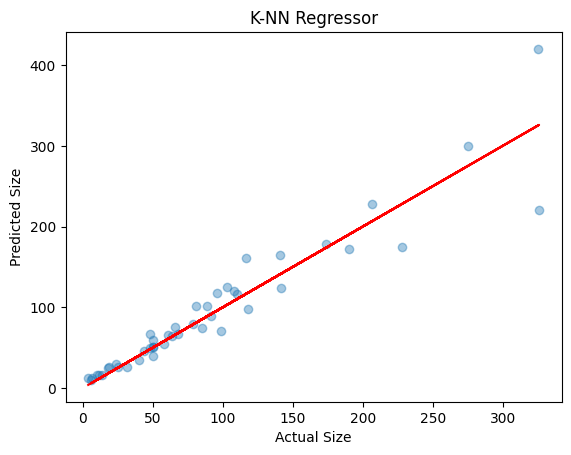

In [28]:
plt.scatter(y_test, knr_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("K-NN Regressor")
plt.show()

### 3.4 서포트벡터머신(SVM)

--- 

**서포트벡터머신(SVM)** : 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만드며, 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데 SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾음

- **kernel** : 선형 커널
- **C** : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
- **Epsilon** : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

In [29]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1, epsilon=0.1).fit(X_train, y_train)
svr_pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
r2 = r2_score(y_test, svr_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.7211826653204465
평균제곱근오차 :  41.867631413528954


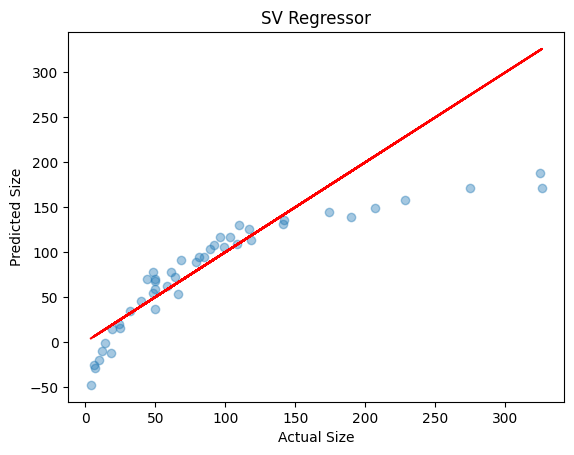

In [30]:
plt.scatter(y_test, svr_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("SV Regressor")
plt.show()

### 3.5 AdaBoost(Adaptive Boost)

---

**Adaptive Boost** : Adaptive + Boosting 로 만들어진 단어로 약한 분류기(weak classifier)들이 상호보완 하도록 순차적(sequential)으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기(strong classifier)의 성능을 향상시키는 것

In [31]:
from sklearn.ensemble import AdaBoostRegressor

Ada = AdaBoostRegressor().fit(X_train, y_train)
ada_pred = Ada.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
r2 = r2_score(y_test, ada_pred)

print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.8772768587098962
평균제곱근오차 :  27.77676970295554


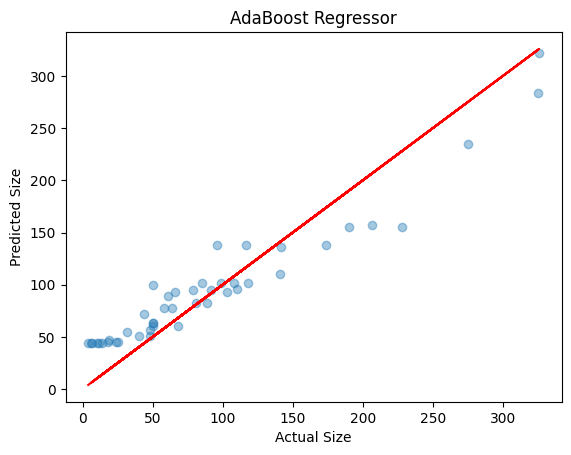

In [32]:
plt.scatter(y_test, ada_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("AdaBoost Regressor")
plt.show()

### 3.6 Bagging

---

**배깅(Bagging)** : Bootstrap Aggregation의 약자로 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과물을 집계하는 방법

In [33]:
from sklearn.ensemble import BaggingRegressor

Bagging = BaggingRegressor().fit(X_train, y_train)
bag_pred = Bagging.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, bag_pred))
r2 = r2_score(y_test, bag_pred)

print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.9677947607514453
평균제곱근오차 :  14.229242191112405


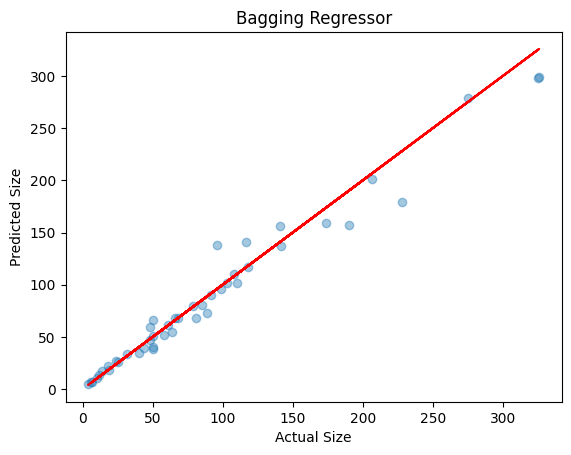

In [34]:
plt.scatter(y_test, bag_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("Bagging Regressor")
plt.show()

### 3.7 의사 결정 나무 (Decision Tree)

---

In [35]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)
dt_pred=DT.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
r2 = r2_score(y_test, dt_pred)
# round: 소수점 n째 자리까지 반올림
print('결정계수 :', round(r2,4))
print('평균제곱근오차 : ', round(rmse,4))

결정계수 : 0.9544
평균제곱근오차 :  16.9312


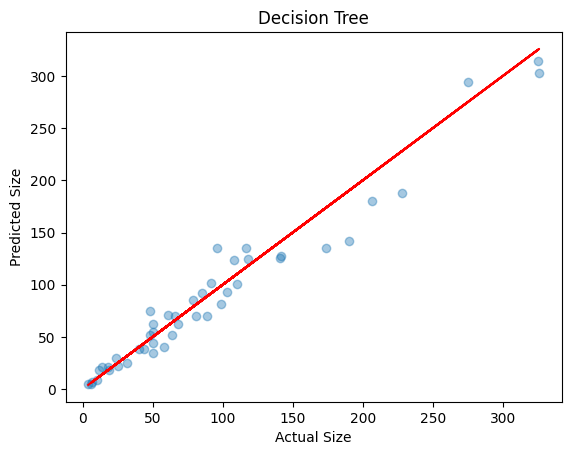

In [36]:
plt.scatter(y_test, dt_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("Decision Tree")
plt.show()

### 3.8 랜덤 포레스트 (RandomForest)

---

**랜덤포레스트** : 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 회귀 분석을 수행

In [37]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=20)
RF.fit(X_train,y_train)

rf_pred = RF.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2 = r2_score(y_test, rf_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.9657727276583291
평균제곱근오차 :  14.669139942977797


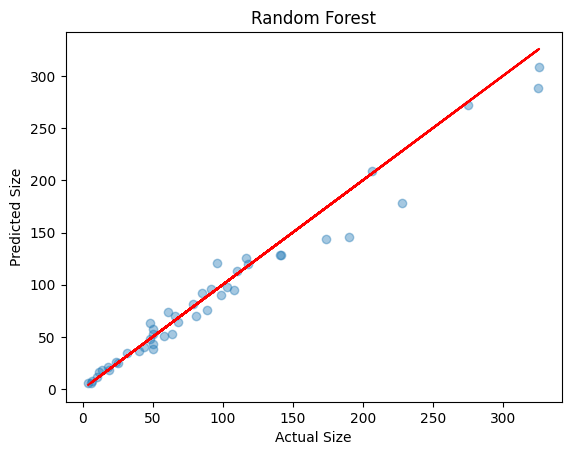

In [38]:
plt.scatter(y_test, rf_pred, alpha=0.4)
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("Random Forest")
plt.show()

## 4. 연습문제

---

### 4.1 선형 회귀분석을 수행할 수 있는 코드를 완성하시오.

사이킷런에서 제공하는 선형회귀 라이브러리를 활용하여 학습 데이터세트를 학습하고 예측합니다. r2_score와 평균제곱근오차(RMSE)를 평가지표로 활용합니다.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2 = r2_score(y_test, lr_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.5776680930313834
평균제곱근오차 :  51.52825711652823


### 4.2 서포트벡터머신(SVM)을 활용해 회귀분석을 수행할 수 있는 코드를 완성하시오.

서포트벡터머신의 회귀분석을 위한 라이브러리인 SVR을 사용하고 커널은 '선형' C값은 1, 앱실론은 0.1로 세팅합니다. 

In [43]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1 , epsilon= 0.1).fit(X_train, y_train)
svr_pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
r2 = r2_score(y_test, svr_pred)
print('결정계수 :', r2)
print('평균제곱근오차 : ', rmse)

결정계수 : 0.7211826653204465
평균제곱근오차 :  41.867631413528954


### 4.3 선형 회귀분석 결과와 서포트벡터머신의 회귀분석 결과값을 시각화하는 코드를 완성하시오.

그래프는 선형그래프 1개와 산점도로 표시하고 alpha값은 0.4로 지정합니다. 선형 그래프의 색은 '빨간색'으로 지정합니다.

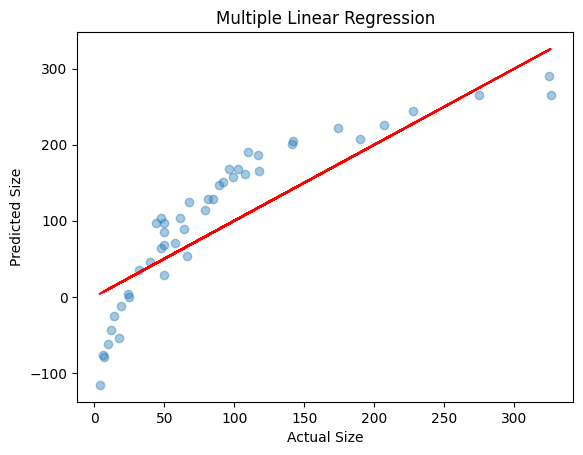

In [48]:
# 선형회귀
plt.scatter(y_test, lr_pred, alpha = 0.4)
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("Multiple Linear Regression")
plt.show()

/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


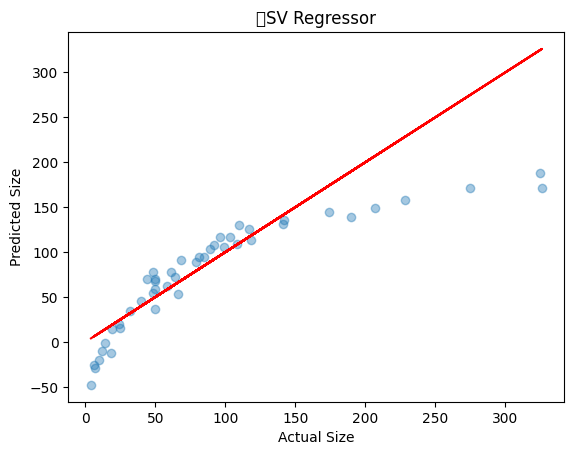

In [49]:
# 서포트벡터머신
plt.scatter(y_test, svr_pred, alpha = 0.4)
plt.plot(y_test, y_test, color = 'r')
plt.xlabel("Actual Size")
plt.ylabel("Predicted Size")
plt.title("SV Regressor")
plt.show()

-----------------

## K-fold cross validation

위에서 사용한 성능 평가 방식은 데이터의 크기가 충분히 크지 않아 random_state의 값에 따라서 성능이 크게 변할 수 있습니다.\
이 영향을 최대한 줄이고자 K-fold cross validation을 수행합니다.

In [50]:
from sklearn.model_selection import KFold

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1 )

kf=KFold(n_splits=5) # 5개 set으로 나누기

models=[ ['LR', LinearRegression()],
        ['KNN', KNeighborsRegressor()],
        ['SVM', SVR(kernel='linear', C=1, epsilon=0.1)],
        ['Adaboost',AdaBoostRegressor()],
        ['Bagging', BaggingRegressor()],
        ['Decision Tree',DecisionTreeRegressor()],
        ['Random Forest',RandomForestRegressor(n_estimators=150)]
]

result={} # dictionary로 만들어 result[model_name]의 결과값에 전체를 다 합치고 평균을 내기 위함

c=0
for train_index, test_index in kf.split(X): #kf의 결과로 train, test에 해당하는 index가 5번 바뀜
    c+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    for model_name, model in models:
        y_pred=model.fit(X_train,y_train).predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        if model_name not in result: # 처음에는 dictionary가 비어 있으므로 
            result[model_name]=0
            
        result[model_name] = result[model_name]+rmse
        
for key in result:
    result[key]=round(result[key]/5,4)
print(result)

{'LR': 66.1868, 'KNN': 51.2516, 'SVM': 79.4926, 'Adaboost': 30.4563, 'Bagging': 19.7911, 'Decision Tree': 23.7249, 'Random Forest': 17.5686}


### K-fold cross validation with Scaling

객관적인 비교 환경을 확보했으니, 이제 Scaling의 영향을 보고자 합니다.\
Minmax Scaler, Standard Scaler 두 개를 적용한 데이터를 넣어서 성능 변화를 보겠습니다.

* Scaling은 반드시 train_test split 이후에 수행되어야 합니다. Split보다 Scaling이 먼저 이루어지게 되면 test 데이터까지 참고하여 Scaling이 이루어지게 되고, 이 데이터로 학습을 진행하게 되면 정상적인 학습이 아니게 됩니다.
* 따라서 train_test split을 먼저 수행하고, train에 대해 scaler를 fit 한 다음 transform하고, test에 대해 같은 scaler로 transform이 이루어져야 합니다.

In [51]:
models=[ ['LR', LinearRegression()],
        ['KNN', KNeighborsRegressor()],
        ['SVM', SVR(kernel='linear', C=1, epsilon=0.1)],
        ['Adaboost',AdaBoostRegressor()],
        ['Bagging', BaggingRegressor()],
        ['Decision Tree',DecisionTreeRegressor()],
        ['Random Forest',RandomForestRegressor(n_estimators=150)]
]

result={} 
result_minmax={}  # mimnax scaled data 결과를 저장할 dict
result_sta={} # standard scaled data 결과를 저장할 dict

for train_index, test_index in kf.split(X): # kf의 결과로 train, test에 해당하는 index가 5번 바뀜

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #minmax scaler
    scaler=MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax=scaler.transform(X_train)
    X_test_minmax= scaler.transform(X_test)
    
    #standard scaler
    scaler2=StandardScaler()
    scaler2.fit(X_train)
    
    X_train_sta=scaler2.transform(X_train)
    X_test_sta = scaler2.transform(X_test)
    
    for model_name, model in models:
        y_pred=model.fit(X_train,y_train).predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        if model_name not in result: # 처음에는 dictionary가 비어 있으므로 
            result[model_name]=0
        result[model_name]= result[model_name]+rmse

        #minmax scaler
        y_pred_minmax=model.fit(X_train_minmax,y_train).predict(X_test_minmax)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_minmax))
        if model_name not in result_minmax:  # 처음에는 dictionary가 비어 있으므로 
            result_minmax[model_name]=0
        result_minmax[model_name]= result_minmax[model_name]+rmse
        
        #standard scaler
        y_pred_sta=model.fit(X_train_sta,y_train).predict(X_test_sta)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_sta))
        if model_name not in result_sta:  # 처음에는 dictionary가 비어 있으므로 
            result_sta[model_name]=0
        result_sta[model_name]= result_sta[model_name]+rmse
        
for key in result:
    result[key]=round(result[key]/5,4)
    result_minmax[key]=round(result_minmax[key]/5,4)
    result_sta[key]=round(result_sta[key]/5,4)
    
print('Raw data')
print(result)
print('\nMinmax')
print(result_minmax)
print('\nStandard')
print(result_sta)

Raw data
{'LR': 66.1868, 'KNN': 51.2516, 'SVM': 79.4926, 'Adaboost': 31.4028, 'Bagging': 22.8569, 'Decision Tree': 26.2122, 'Random Forest': 18.1725}

Minmax
{'LR': 66.1868, 'KNN': 33.4785, 'SVM': 110.2635, 'Adaboost': 31.7838, 'Bagging': 20.2863, 'Decision Tree': 26.9105, 'Random Forest': 18.4908}

Standard
{'LR': 66.1868, 'KNN': 38.8457, 'SVM': 86.3218, 'Adaboost': 30.2442, 'Bagging': 19.7283, 'Decision Tree': 25.2841, 'Random Forest': 17.2168}


* 성능이 그대로인 모델 : LR
* 성능이 좋아진 모델 : KNN
* 성능이 나빠진 모델 : SVM
* 성능이 비슷한 모델 : Tree기반 모델들 (AdaBoost, Bagging, DT, RF)

#### Scaling은 무조건 수행하기 보다는, 사용하는 방법과 데이터의 분포를 활용한 뒤 적용을 고려해야 한다는 결론을 얻을 수 있습니다.

---

### KNN model 최적의 N_neighbors 탐색

최적의 파라미터를 찾는 것은 매우 중요합니다.\
KNN 모델을 통해서 파라미터의 변화가 성능에 어떤 영향을 주는지 확인해 봅시다.

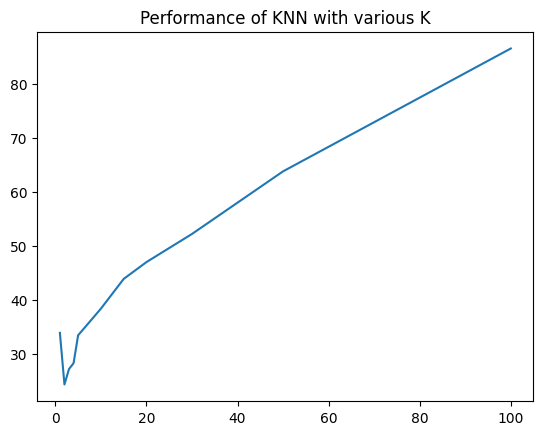

In [52]:
models=[ ['KNN1', KNeighborsRegressor(n_neighbors=1)],
        ['KNN2', KNeighborsRegressor(n_neighbors=2)],
        ['KNN3', KNeighborsRegressor(n_neighbors=3)],
        ['KNN4', KNeighborsRegressor(n_neighbors=4)],
        ['KNN5', KNeighborsRegressor(n_neighbors=5)],
        ['KNN10', KNeighborsRegressor(n_neighbors=10)],
        ['KNN15', KNeighborsRegressor(n_neighbors=15)],
        ['KNN20', KNeighborsRegressor(n_neighbors=20)],
        ['KNN30', KNeighborsRegressor(n_neighbors=30)],
        ['KNN50', KNeighborsRegressor(n_neighbors=50)],
        ['KNN100', KNeighborsRegressor(n_neighbors=100)],
]

result_minmax={}  #mimnax scaled data 결과를 저장할 dict

for train_index, test_index in kf.split(X): # kf의 결과로 train, test에 해당하는 index가 5번 바뀜

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #minmax scaler
    scaler=MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax=scaler.transform(X_train)
    X_test_minmax= scaler.transform(X_test)

    for model_name, model in models:
        y_pred_minmax=model.fit(X_train_minmax,y_train).predict(X_test_minmax)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_minmax))
        if model_name not in result_minmax:  # 처음에는 dictionary가 비어 있으므로 
            result_minmax[model_name]=0
        result_minmax[model_name]= result_minmax[model_name]+rmse
        
for key in result_minmax:
    result_minmax[key]=round(result_minmax[key]/5,4)

KNN_X=[]
KNN_Y=[]
for key,value in result_minmax.items():
    #key:'KNN1','KNN3',...
    K=int(key[3:]) # N: 1,3,...
    KNN_X.append(K)
    KNN_Y.append(value)

plt.plot(KNN_X,KNN_Y)
plt.title("Performance of KNN with various K")
plt.show()

In [53]:
result_minmax

{'KNN1': 33.9339,
 'KNN2': 24.3695,
 'KNN3': 27.2286,
 'KNN4': 28.3088,
 'KNN5': 33.4785,
 'KNN10': 38.4114,
 'KNN15': 43.9185,
 'KNN20': 47.0383,
 'KNN30': 52.2511,
 'KNN50': 63.8502,
 'KNN100': 86.6101}

#### K값이 2일 때 가장 성능이 좋은 것을 확인할 수 있습니다.